# Import Libraries 

In [48]:
import os
import pandas as pd
import re 
import numpy as np
from sklearn import linear_model
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import collections
from sklearn.metrics import f1_score
from sklearn import tree

In [49]:
df = pd.read_csv('fulldata.csv')

In [50]:
df.dtypes

HYDROXYUREA                    int64
PRODIGY INSULIN SYRINGE        int64
CARDENE SR                     int64
SULINDAC                       int64
CIPRO                          int64
RISPERDAL CONSTA               int64
PROCTOSOL-HC                   int64
FLUPHENAZINE DECANOATE         int64
SOMA                           int64
VITAL-D RX                     int64
DEPACON                        int64
TL G-FOL OS                    int64
GAMMAGARD LIQUID               int64
ACETAMINOPHEN-BUTALBITAL       int64
PREVIDENT 5000 SENSITIVE       int64
MEDROXYPROGESTERONE ACETATE    int64
MS CONTIN                      int64
PYRAZINAMIDE                   int64
METHSCOPOLAMINE BROMIDE        int64
ELINEST                        int64
LOPERAMIDE                     int64
FUROSEMIDE                     int64
UNITHROID                      int64
MICARDIS                       int64
BICILLIN L-A                   int64
CANCIDAS                       int64
AZACTAM                        int64
A

In [51]:
df.shape

(239930, 2404)

In [52]:
data2 = df[['brand_name_rx_count', 'gender', 'generic_rx_count', 'region', 'settlement_type', 'specialty', 'years_practicing']]
data2.head()

,brand_name_rx_count,gender,generic_rx_count,region,settlement_type,specialty,years_practicing
0,384,M,2287,South,non-urban,Nephrology,7
1,0,M,103,South,non-urban,General Practice,7
2,0,M,112,Midwest,non-urban,General Practice,7
3,0,M,63,South,non-urban,General Practice,7
4,316,M,1035,West,non-urban,Nephrology,6


In [53]:
df_specialty = df[['specialty']]
df_specialty['specialty'].unique()

array(['Nephrology', 'General Practice', 'Endodontics',
       'Gastroenterology', 'Psychiatry', 'Rheumatology',
       'Plastic and Reconstructive Surgery', 'Hematology & Oncology',
       'Hematology', 'Cardiovascular Disease', 'Family',
       'Psych/Mental Health', 'Foot Surgery', 'Pulmonary Disease',
       'Infectious Disease', 'Adult Health',
       'Clinical Cardiac Electrophysiology', 'Acute Care', 'Medical',
       'Periodontics', 'Foot and Ankle Surgery', 'Hand Surgery',
       'Surgical Technologist', 'Neurology', 'Medical Oncology',
       'Gynecology', 'Foot & Ankle Surgery', 'Critical Care Medicine',
       'Radiation Oncology', 'Psych/Mental Health, Adult',
       'Pain Medicine', 'Pediatric Cardiology', "Women's Health",
       'Emergency Medical Services', 'Child & Adolescent Psychiatry',
       'Endocrinology, Diabetes & Metabolism', 'Geriatric Medicine',
       'Oral and Maxillofacial Surgery', 'Sports Medicine',
       'Hospice and Palliative Medicine', 'Mental Hea

In [54]:
 top7_specialty = df_specialty[(df_specialty.values  == 'Cardiovascular Disease')|(df_specialty.values  == 'Family' )|(df_specialty.values  == 'Gastroenterology')|(df_specialty.values  == 'General Practice')|(df_specialty.values  == 'Medical')|(df_specialty.values  == 'Neurology')|(df_specialty.values  == 'Psychiatry')]

In [55]:
df_drugs = df.drop(['brand_name_rx_count', 'gender', 'generic_rx_count', 'region', 'settlement_type', 'specialty', 'years_practicing'], axis=1)

# 239,930 records and 2397 columns (drugs)

In [56]:
df_drugs.shape

(239930, 2397)

# List of drug names

In [60]:
drugname_list = df_drugs.columns.tolist()

In [61]:
# Check how many rows and columns we have
print('Number of instances = %d' % (data2.shape[0]))
print('Number of attributes = %d' % (data2.shape[1]))
data2.head()

Number of instances = 239930
Number of attributes = 7


,brand_name_rx_count,gender,generic_rx_count,region,settlement_type,specialty,years_practicing
0,384,M,2287,South,non-urban,Nephrology,7
1,0,M,103,South,non-urban,General Practice,7
2,0,M,112,Midwest,non-urban,General Practice,7
3,0,M,63,South,non-urban,General Practice,7
4,316,M,1035,West,non-urban,Nephrology,6


## Useful Functions:

In [62]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [63]:
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

In [64]:
from collections import Counter
from colour import Color
import json
from operator import itemgetter
import pandas as pd
from scipy import stats
import six
from statsmodels.graphics.mosaicplot import mosaic
import sys
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import StratifiedKFold, ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from lime.lime_tabular import LimeTabularExplainer
import tensorflow as tf

def target_barplot(series, figsize):
    ax = plt.subplot()
    counts = series.value_counts()
    vals = counts.values
    pers = vals / vals.sum()
    ax = plt.subplot()
    counts.plot(title=series.name, kind='barh', figsize=figsize, ax=ax, color = 'slateblue')
    plt.style.use('seaborn-whitegrid')
    nudged_vals = vals * 1.01  
    for i, val in enumerate(nudged_vals):
        formatted_per = '{:0.01%}'.format(pers[i])
        ax.text(nudged_vals[i], i, formatted_per)
    ax.set_xlim((0, max(counts.values)*1.2))
    return ax

def settlement_mosaic(
        ys, cat2='gender',
        settlement_mincount=1500,
        settlement_maxcount=None):
   
    cat2 = ys[cat2]
    settlement = ys['settlement_type']
    dist = settlement.value_counts()
    if settlement_maxcount == None:
        settlement_maxcount = dist.max()    
    subset = [s for s,c in dist.items()
              if c >= settlement_mincount and c <= settlement_maxcount]        
    settlement = settlement[settlement.isin(subset)]
    target_mosaic(cat2, settlement)


def region_mosaic(
        ys, cat2='gender',
        region_mincount=1500,
        region_maxcount=None):
   
    cat2 = ys[cat2]
    region = ys['region']
    dist = region.value_counts()
    if region_maxcount == None:
        region_maxcount = dist.max()    
    subset = [s for s,c in dist.items()
              if c >= region_mincount and c <= region_maxcount]        
    region = region[region.isin(subset)]
    target_mosaic(cat2, region)

def specialty_mosaic(
        ys, cat2='gender',
        specialty_mincount=1500,
        specialty_maxcount=None):
   
    cat2 = ys[cat2]
    specialty = ys['specialty']
    dist = specialty.value_counts()
    if specialty_maxcount == None:
        specialty_maxcount = dist.max()    
    subset = [s for s,c in dist.items()
              if c >= specialty_mincount and c <= specialty_maxcount]        
    specialty = specialty[specialty.isin(subset)]
    target_mosaic(cat2, specialty)

def years_practicing_mosaic(
        ys, cat2='gender',
        years_mincount=1500,
        years_maxcount=None):
   
    cat2 = ys[cat2]
    years = ys['years_practicing']
    dist = years.value_counts()
    if years_maxcount == None:
        years_maxcount = dist.max()    
    subset = [s for s,c in dist.items()
              if c >= years_mincount and c <= years_maxcount]        
    years = years[years.isin(subset)]
    target_mosaic(cat2, years)

def region_specialty_mosaic(
        ys, cat2='region',
        specialty_mincount=1500,
        specialty_maxcount=None):
   
    cat2 = ys[cat2]
    specialty = ys['specialty']
    dist = specialty.value_counts()
    if specialty_maxcount == None:
        specialty_maxcount = dist.max()    
    subset = [s for s,c in dist.items()
              if c >= specialty_mincount and c <= specialty_maxcount]        
    specialty = specialty[specialty.isin(subset)]
    target_mosaic(cat2, specialty)
    

def region_settlement_mosaic(
        ys, cat2='settlement_type',
        region_mincount=1500,
        region_maxcount=None):
   
    cat2 = ys[cat2]
    region = ys['region']
    dist = region.value_counts()
    if region_maxcount == None:
        region_maxcount = dist.max()    
    subset = [s for s,c in dist.items()
              if c >= region_mincount and c <= region_maxcount]        
    region = region[region.isin(subset)]
    target_mosaic(cat2, region)

    
def specialty_settlement_mosaic(
        ys, cat2='settlement_type',
        specialty_mincount=1500,
        specialty_maxcount=None):
   
    cat2 = ys[cat2]
    specialty = ys['specialty']
    dist = specialty.value_counts()
    if specialty_maxcount == None:
        specialty_maxcount = dist.max()    
    subset = [s for s,c in dist.items()
              if c >= specialty_mincount and c <= specialty_maxcount]        
    specialty = specialty[specialty.isin(subset)]
    target_mosaic(cat2, specialty)

    
def target_mosaic(cat1, cat2, figsize=(18, 4)):
    xtab = pd.crosstab(cat1, cat2).unstack()
    # Bas colors:
    colors = ['#0499CC', '#4D8951', '#FDBA58', '#876DB5',
              '#32A8B4', '#9BB8D7', '#839A8A']        
    color_count = len(colors)
    # These need to be strings for `mosaic`.
    cat1_levels = list(map(str, cat1.value_counts().keys().values))
    cat2_levels = list(map(str, cat2.value_counts().keys().values))
        
    def prop(key):
        c2, c1 = key                       
        cat1_index = cat1_levels.index(c1)
        cat2_index = cat2_levels.index(c2)
        base_color = colors[cat2_index % color_count]
        adjusted = increase_luminance(base_color, multiplier=cat1_index)
        return adjusted

    # Display only the y-axis category inside the box:
    lab = (lambda key : key[1])
    fig, _ = mosaic(xtab, gap=0.01, labelizer=lab, properties=prop)
    figwidth, figheight = figsize
    fig.set_figwidth(figwidth)
    fig.set_figheight(figheight)    

    
def increase_luminance(color_str, multiplier=0):
    """Increase the luminance of the color represented by `color_str`.

    Parameters
    ----------
    color_str : str
        A color in one of the formats recognized by `colour.Color`.

    multipler : int
        The final color will be decreased by 0.1*multiplier, from
        a starting point of 0.8.

    Returns
    -------
    dict
        {'color': str} where str is the modified color. (This is the
        format required by `mosaic`.
    """
    
    c = Color(color_str)
    lum = 0.8 - np.repeat(0.1, multiplier).sum()
    c.luminance = lum
    return {'color': str(c)}

# Pie Chart Drug Distribution

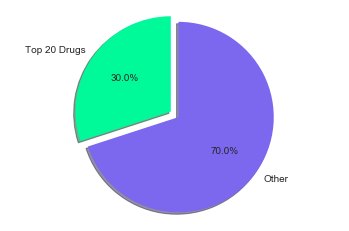

In [99]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Top 20 Drugs', 'Other'
sizes = [30, 70]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['mediumspringgreen', 'mediumslateblue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors= colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Record counts by region 

In [38]:
# Unique regions
data2['region'].unique()

array(['South', 'Midwest', 'West', 'Northeast'], dtype=object)

In [15]:
data2['region'].value_counts()

South        80562
Northeast    59012
West         50279
Midwest      50077
Name: region, dtype: int64

C:\Users\nicba\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


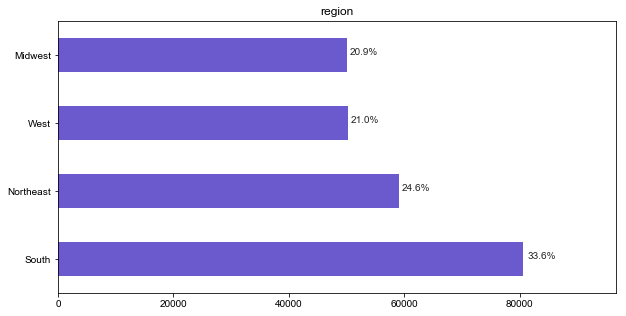

In [16]:
region_plot = target_barplot(data2['region'], figsize=(10,5))

# Record counts by gender

In [17]:
data2['gender'].unique()

array(['M', 'F'], dtype=object)

In [18]:
data2['gender'].value_counts()

M    149657
F     90273
Name: gender, dtype: int64

C:\Users\nicba\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


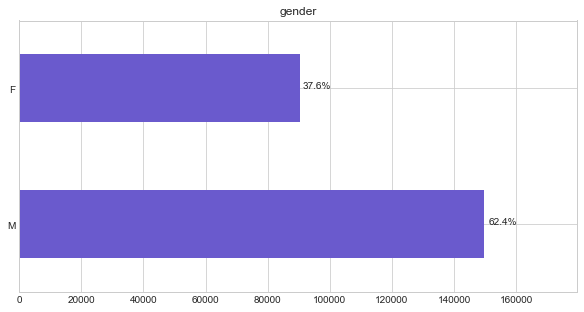

In [19]:
gender_plot = target_barplot(data2['gender'], figsize=(10, 5))

# Record counts by specialty

In [20]:
data2['specialty'].unique()

array(['Nephrology', 'General Practice', 'Endodontics',
       'Gastroenterology', 'Psychiatry', 'Rheumatology',
       'Plastic and Reconstructive Surgery', 'Hematology & Oncology',
       'Hematology', 'Cardiovascular Disease', 'Family',
       'Psych/Mental Health', 'Foot Surgery', 'Pulmonary Disease',
       'Infectious Disease', 'Adult Health',
       'Clinical Cardiac Electrophysiology', 'Acute Care', 'Medical',
       'Periodontics', 'Foot and Ankle Surgery', 'Hand Surgery',
       'Surgical Technologist', 'Neurology', 'Medical Oncology',
       'Gynecology', 'Foot & Ankle Surgery', 'Critical Care Medicine',
       'Radiation Oncology', 'Psych/Mental Health, Adult',
       'Pain Medicine', 'Pediatric Cardiology', "Women's Health",
       'Emergency Medical Services', 'Child & Adolescent Psychiatry',
       'Endocrinology, Diabetes & Metabolism', 'Geriatric Medicine',
       'Oral and Maxillofacial Surgery', 'Sports Medicine',
       'Hospice and Palliative Medicine', 'Mental Hea

In [21]:
data2['specialty'].value_counts()

General Practice                                                             47836
Family                                                                       24230
Psychiatry                                                                   22530
Cardiovascular Disease                                                       13091
Medical                                                                      12445
Gastroenterology                                                              9695
Neurology                                                                     8501
Adult Health                                                                  7444
Nephrology                                                                    5997
Hematology & Oncology                                                         5852
Pulmonary Disease                                                             4295
Endocrinology, Diabetes & Metabolism                                          4136
Oral

In [22]:
list2 = ['General Practice', 'Family', 'Psychiatry', 'Cardiovascular Disease', 'Medical', 'Gastroenterology', 'Neurology', 'Adult Health', 'Nephrology', 'Hematology & Oncology', 'Pulmonary Disease', 'Endocrinology, Diabetes & Metabolism', 'Oral and Maxillofacial Surgery']           
specialty_data = data2[data2['specialty'].isin(list2)]
specialty_data['specialty'].unique()

array(['Nephrology', 'General Practice', 'Gastroenterology', 'Psychiatry',
       'Hematology & Oncology', 'Cardiovascular Disease', 'Family',
       'Pulmonary Disease', 'Adult Health', 'Medical', 'Neurology',
       'Endocrinology, Diabetes & Metabolism',
       'Oral and Maxillofacial Surgery'], dtype=object)

C:\Users\nicba\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


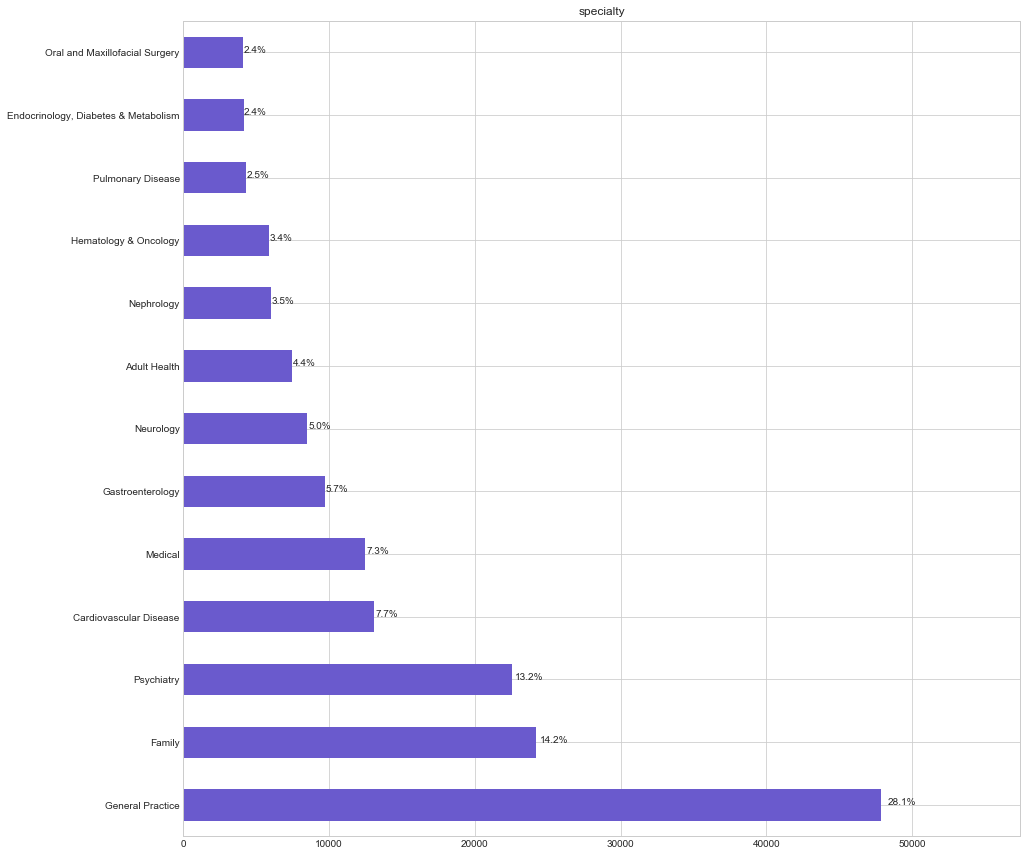

In [23]:
specialty_plot = target_barplot(specialty_data['specialty'], figsize=(15, 15))

# Record counts by settlement type

In [24]:
data2['settlement_type'].unique()

array(['non-urban', 'urban'], dtype=object)

In [25]:
data2['settlement_type'].value_counts()

non-urban    152270
urban         87660
Name: settlement_type, dtype: int64

C:\Users\nicba\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


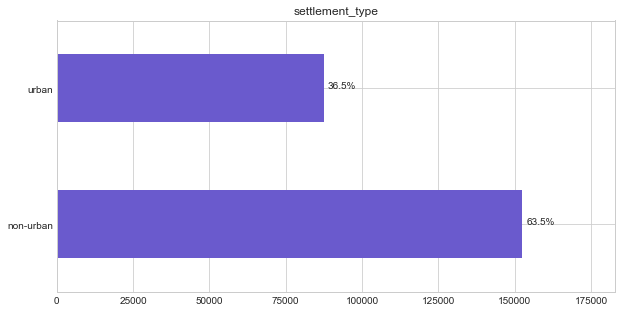

In [26]:
settlement_type_plot = target_barplot(data2['settlement_type'], figsize=(10, 5))

# Record counts by years practicing

In [27]:
data2['years_practicing'].unique()

array([7, 6, 4, 5, 1, 8, 3, 2], dtype=int64)

In [28]:
data2['years_practicing'].value_counts()

7    117540
6     47160
8     30807
5     13306
4      8187
3      7737
2      7735
1      7458
Name: years_practicing, dtype: int64

C:\Users\nicba\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


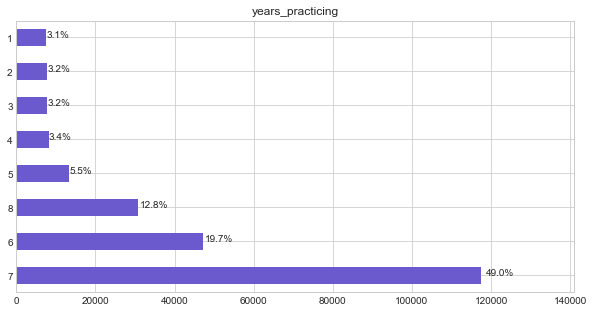

In [29]:
years_practicing_plot = target_barplot(data2['years_practicing'], figsize=(10, 5))


# Gender and Top 7 Specialties

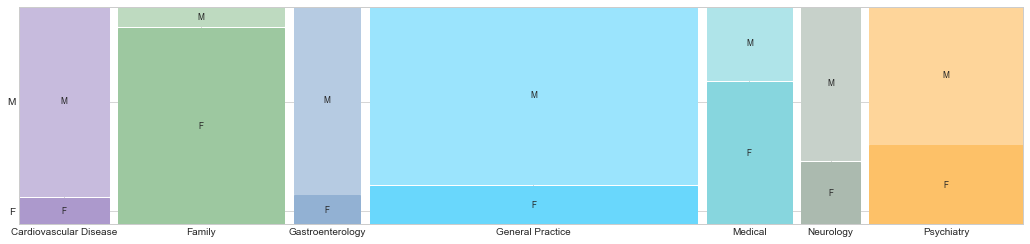

In [30]:
specialty_mosaic(data2, cat2='gender', specialty_mincount=8000, specialty_maxcount=50000)

In [31]:
data2['specialty'].value_counts()

General Practice                                                             47836
Family                                                                       24230
Psychiatry                                                                   22530
Cardiovascular Disease                                                       13091
Medical                                                                      12445
Gastroenterology                                                              9695
Neurology                                                                     8501
Adult Health                                                                  7444
Nephrology                                                                    5997
Hematology & Oncology                                                         5852
Pulmonary Disease                                                             4295
Endocrinology, Diabetes & Metabolism                                          4136
Oral

# Gender and Settlement Type

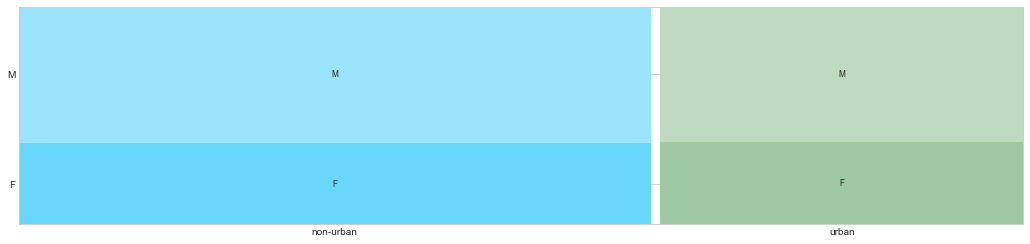

In [32]:
settlement_mosaic(data2, cat2='gender')

# Gender and Region

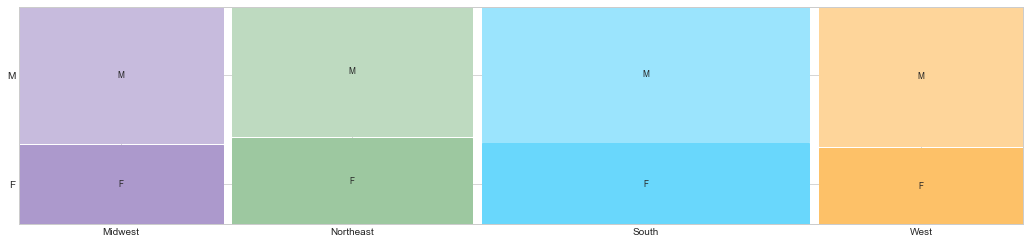

In [33]:
region_mosaic(data2, cat2='gender')

# Gender and Years Practicing

In [34]:
data2['years_practicing'].value_counts()

7    117540
6     47160
8     30807
5     13306
4      8187
3      7737
2      7735
1      7458
Name: years_practicing, dtype: int64

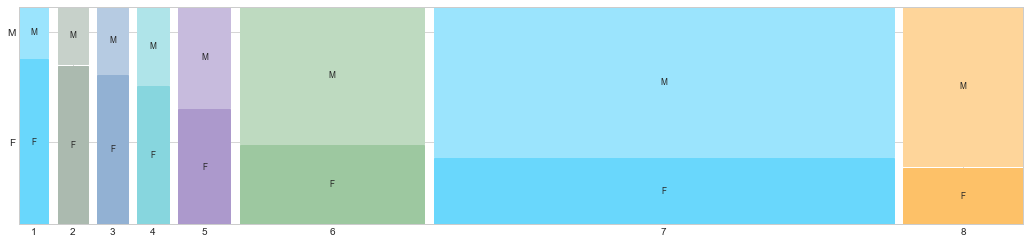

In [35]:
years_practicing_mosaic(data2, cat2='gender',years_mincount=7000, years_maxcount=120000)
plt.show()

# Region and Settlement Type

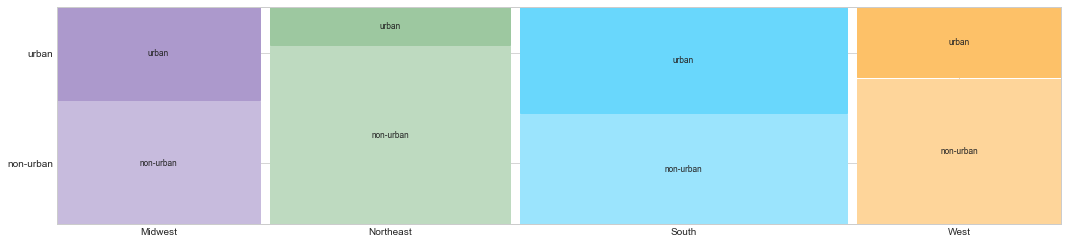

In [36]:
region_settlement_mosaic(data2, cat2='settlement_type')

# Settlement Type and Specialty

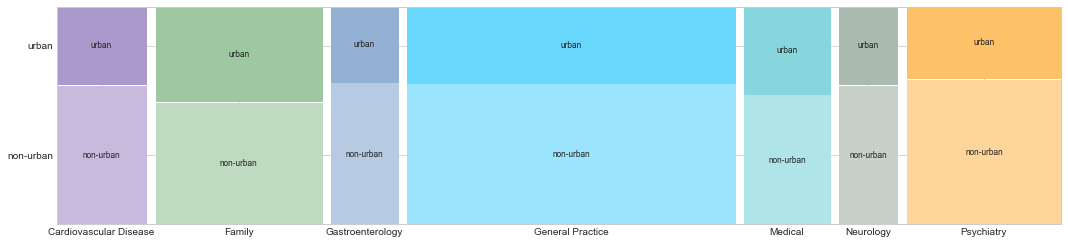

In [37]:
specialty_settlement_mosaic(data2, cat2='settlement_type', specialty_mincount=8000, specialty_maxcount=50000)

In [38]:
# Check data types so we know what needs to be one hot encoded
data2.dtypes

brand_name_rx_count     int64
gender                 object
generic_rx_count        int64
region                 object
settlement_type        object
specialty              object
years_practicing        int64
dtype: object

In [39]:
# Create subset of data with only a few columns used for association analysis
data3 = data2[['gender', 'specialty', 'settlement_type']]
d2 = data2[['gender', 'specialty']]
d3 = data2[['gender', 'region']]

In [40]:
encode_text_dummy(data3, 'gender')

C:\Users\nicba\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\nicba\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [41]:
encode_text_dummy(data3, 'specialty')

C:\Users\nicba\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [42]:
encode_text_dummy(data3, 'settlement_type')

In [43]:
data3.head()

,gender-F,gender-M,specialty-Acute Care,specialty-Addiction (Substance Use Disorder),specialty-Addiction Medicine,specialty-Addiction Psychiatry,specialty-Administrator,specialty-Adolescent Medicine,specialty-Adolescent and Children Mental Health,specialty-Adult Development & Aging,...,specialty-Vascular Sonography,specialty-Vascular Specialist,specialty-Vascular Surgery,specialty-Vision Therapy,specialty-Women,specialty-Women's Health,"specialty-Women's Health Care, Ambulatory",specialty-Wound Care,settlement_type-non-urban,settlement_type-urban
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
# Get frequent itemsets
freq_items1 = apriori(data3, min_support=0.009, use_colnames=True, verbose=1)
freq_items1.head()

Processing 60 combinations | Sampling itemset size 43


,support,itemsets
0,0.376247,(gender-F)
1,0.623753,(gender-M)
2,0.009461,(specialty-Acute Care)
3,0.031026,(specialty-Adult Health)
4,0.054562,(specialty-Cardiovascular Disease)


In [45]:
# Get the rules
rules1 = association_rules(freq_items1, metric="confidence", min_threshold=0.2)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(specialty-Adult Health),(gender-F),0.031026,0.376247,0.028917,0.932026,2.477163,0.017243,9.176315
1,(specialty-Family),(gender-F),0.100988,0.376247,0.091814,0.909162,2.416396,0.053818,6.866665
2,(gender-F),(specialty-Family),0.376247,0.100988,0.091814,0.244026,2.416396,0.053818,1.189211
3,(specialty-Medical),(gender-F),0.051869,0.376247,0.034243,0.660185,1.754657,0.014728,1.835565
4,(specialty-Neurology),(gender-F),0.035431,0.376247,0.010274,0.289966,0.770679,-0.003057,0.878483
5,(specialty-Psych/Mental Health),(gender-F),0.013020,0.376247,0.011407,0.876120,2.328576,0.006509,5.035151
6,(specialty-Psychiatry),(gender-F),0.093902,0.376247,0.034352,0.365823,0.972295,-0.000979,0.983563
7,(settlement_type-non-urban),(gender-F),0.634643,0.376247,0.237782,0.374670,0.995808,-0.001001,0.997478
8,(gender-F),(settlement_type-non-urban),0.376247,0.634643,0.237782,0.631983,0.995808,-0.001001,0.992771
9,(gender-F),(settlement_type-urban),0.376247,0.365357,0.138465,0.368017,1.007282,0.001001,1.004210


### Trial 1 Visualization 

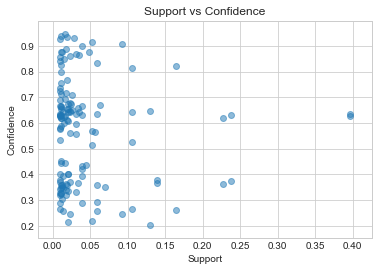

In [46]:
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

In [47]:
# Only grab needed columns from rule results
rules1_results = rules1[['antecedents', 'consequents', 'confidence']]

In [48]:
rules1_results.head()

,antecedents,consequents,confidence
0,(specialty-Adult Health),(gender-F),0.932026
1,(specialty-Family),(gender-F),0.909162
2,(gender-F),(specialty-Family),0.244026
3,(specialty-Medical),(gender-F),0.660185
4,(specialty-Neurology),(gender-F),0.289966


In [49]:
rules1_results['confidence'].values

array([0.93202579, 0.9091622 , 0.24402645, 0.66018481, 0.28996589,
       0.87612036, 0.36582335, 0.37466999, 0.63198298, 0.36801702,
       0.378987  , 0.87655641, 0.57930368, 0.85698198, 0.79770115,
       0.86518824, 0.26250693, 0.82126432, 0.71770335, 0.63669777,
       0.33981519, 0.76771719, 0.71003411, 0.94527607, 0.82386364,
       0.63417665, 0.84982538, 0.62839792, 0.62533001, 0.63624822,
       0.36375178, 0.621013  , 0.65421816, 0.34578184, 0.64150943,
       0.35849057, 0.66610251, 0.5635163 , 0.4364837 , 0.68936782,
       0.65198556, 0.34801444, 0.20338215, 0.64739945, 0.35260055,
       0.62371839, 0.37628161, 0.66553576, 0.59702692, 0.40297308,
       0.5994664 , 0.4005336 , 0.64227738, 0.35772262, 0.66134969,
       0.72547847, 0.66875277, 0.33124723, 0.63259604, 0.63100058,
       0.9338809 , 0.65552032, 0.61096185, 0.34447968, 0.92851593,
       0.32106394, 0.91606855, 0.56779699, 0.21924243, 0.51621956,
       0.43220301, 0.90024584, 0.2865872 , 0.39294263, 0.67333

In [59]:
# Filter rules based on a relatively high confidence level - 90% 
results = rules1_results[rules1_results['confidence'].values >= .75]
results

,antecedents,consequents,confidence
0,(specialty-Adult Health),(gender-F),0.932026
1,(specialty-Family),(gender-F),0.909162
5,(specialty-Psych/Mental Health),(gender-F),0.876120
11,(specialty-Cardiovascular Disease),(gender-M),0.876556
13,(specialty-Endodontics),(gender-M),0.856982
14,(specialty-Foot & Ankle Surgery),(gender-M),0.797701
15,(specialty-Gastroenterology),(gender-M),0.865188
17,(specialty-General Practice),(gender-M),0.821264
21,(specialty-Nephrology),(gender-M),0.767717
23,(specialty-Oral and Maxillofacial Surgery),(gender-M),0.945276
